# Final Exam Second Semester 2567 - Support Vector Machine (Potion Problem)

This exam problem has an objective to develop a support vector machine model to classify the potions whether they can cure the diseases (class 1) or cannot cure (class 0) from 13 ingredients (features) including
- Phoenix Feather
- Unicorn Horn
- Dragon's Blood
- Mermaid Tears
- Fairy Dust
- Goblin Toes
- Witch's Brew
- Griffin Claw
- Troll Hair
- Kraken Ink
- Minotaur Horn
- Basilisk Scale
- Chimera Fang

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np
np.random.seed(10)

# Plotting library
from matplotlib import pyplot

# Optimization module in scipy
from scipy import optimize

# library written for this exam
import utilsSVM as utils
import matplotlib.pyplot as plt

# tells matplotlib to embed plots within the notebook
%matplotlib inline

import random 
random.seed(10)

### We start the exam by first loading the dataset

In [2]:
# Load training dataset

# Read tab-separated training data
data = np.loadtxt(r'D:\M.eng\Machine learning\final_crisis\data\SVM_PotionData_Train.txt')

# Automatically detect number of features
n_features = data.shape[1] - 1  # Total columns - 1 label column

# First n_features columns are features, last column is the label
X, y = data[:, :13], data[:, 13].astype(int)

m = y.size  # Number of training examples

# Load testing dataset

# Read tab-separated test data
data_test = np.loadtxt(r'D:\M.eng\Machine learning\final_crisis\data\SVM_PotionData_Test.txt')

# Use the same n_features detected earlier
X_test, y_test = data_test[:, :13], data_test[:, 13].astype(int)

# Check dimensions of training and test datasets
print(f"Training set: X shape = {X.shape}, y shape = {y.shape}")
print(f"Test set: X_test shape = {X_test.shape}, y_test shape = {y_test.shape}")

Training set: X shape = (1500, 13), y shape = (1500,)
Test set: X_test shape = (835, 13), y_test shape = (835,)


In [3]:
X.shape

(1500, 13)

In [4]:
y.shape

(1500,)

In [5]:
# Load a new dataset from 3 examples
# This dataset will be used for the last question of this exam problem.

# Read tab separated data
X_new = np.loadtxt(r'D:\M.eng\Machine learning\final_crisis\data\SVM_PotionData_NewData.txt')

# This dataset contains only 13 features from 3 examples and does not have label.
# Matrix X_new contains 13 features.

# Check dimensions of newdata dataset
print(f"New data set: X_new shape = {X_new.shape}")

New data set: X_new shape = (3, 13)


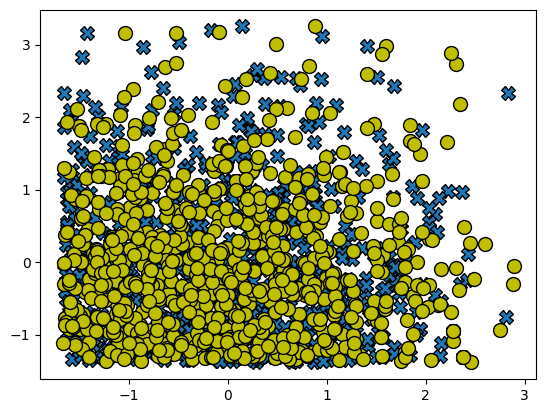

In [6]:
# Plot training data
utils.plotData(X, y)
plt.show()

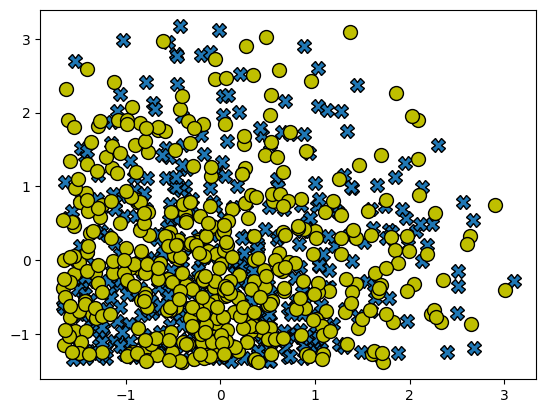

In [7]:
#plot test set
utils.plotData(X_test, y_test )
plt.show()

In [8]:
def gaussianKernel(x1, x2, sigma):
    sim = 0
    sim = np.exp(-(np.sum(np.square(x1-x2)))/(2*np.square(sigma)))
    return sim

In [9]:
#test Kernel function
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
sim = gaussianKernel(x1, x2, sigma)
print('sigma = %0.2f:'
      '\n\t%f\n(for sigma = 2, this value should be about 0.324652)\n' % (sigma, sim))

sigma = 2.00:
	0.324652
(for sigma = 2, this value should be about 0.324652)



In [10]:
C_array = np.array([1,3])
sigma_array = np.array([1,3])

In [11]:
def dataset3Params(X, y, X_test, y_test): 
    C = 1
    sigma = 0.3
    C_array = np.array([0.1,0.3,1,3])
    sigma_array = np.array([0.1,0.3,1,3])
    err_array = np.zeros([C_array.size, sigma_array.size,])
    for i in range(C_array.size):
        for j in range(sigma_array.size):
            model = utils.svmTrain(X, y, C_array[i], gaussianKernel, args = (sigma_array[j],))
            predictions = utils.svmPredict(model, X_test) 
            pred_error = np.mean(predictions != y_test) 
            err_array[i,j] = pred_error
    ind = np.unravel_index(np.argmin(err_array, axis = None), err_array.shape)
    C = C_array[ind[0]]
    sigma = sigma_array[ind[1]]
    
    return C, sigma

In [12]:
C, sigma = dataset3Params(X, y, X_test, y_test)

# Train the SVM using the best parameters (C and sigma) we got from dataset3Params function
model = utils.svmTrain(X, y, C, gaussianKernel, args=(sigma,))
print(C, sigma)

3.0 3.0


In [18]:
print('The best parameters of C is',C)
print('The best parameters of sigma is',sigma)

The best parameters of C is 3.0
The best parameters of sigma is 3.0


In [14]:
p = utils.svmPredict(model, X)
print('Training Accuracy: %.2f' % (np.mean(p == y) * 100))
p_test = utils.svmPredict(model, X_test)
print('Test Accuracy: %.2f' % (np.mean(p_test == y_test) * 100))

Training Accuracy: 97.47
Test Accuracy: 95.45


In [15]:
print(X_new)

[[-1.316785 -0.193885 -1.342474  0.560658 -0.303607  0.578911 -1.188782
  -1.310203  0.298463  0.949701 -0.929481 -0.56103   0.09145 ]
 [ 0.166029  1.290499 -0.357194  1.293249  0.072096 -0.091398  1.718893
  -1.089856  0.422722  1.932325 -1.342331 -0.802384 -0.452795]
 [ 0.177613 -0.90807  -1.781696  2.265597 -0.585384  1.81835   1.270573
   1.162587  1.76886   2.625201 -0.473923 -1.468982  0.660432]]


In [16]:
p_new = utils.svmPredict(model,X_new)

In [17]:
print(p_new)

[0. 1. 1.]


In [19]:
C = 2
model = utils.svmTrain(X, y, C, utils.linearKernel)

In [20]:
p = utils.svmPredict(model, X)
print('Training Accuracy: %.2f' % (np.mean(p == y) * 100))
p_test = utils.svmPredict(model, X_test)
print('Test Accuracy: %.2f' % (np.mean(p_test == y_test) * 100))

Training Accuracy: 87.67
Test Accuracy: 87.07


In [21]:
p_new = utils.svmPredict(model,X_new)

In [22]:
print(p_new)

[0. 1. 1.]


### End of Support Vector Machine Problem